## Intro

딥러닝 모델을 학습 시키기 위해서는 대량의 데이터를 확보해야 합니다.

대표적인 이미지 데이터셋인 이미지넷(ImageNet)은 약 1,400만 장의 이미지를 갖고 있고, 분류 대상 클래스가 10개라 상대적으로 간단해 보이는 CIFAR-10도 몇 만 장의 데이터를 가지고 있습니다.

미리 공개되어 있는 데이터셋 외에도 우리가 원하는 문제를 풀 때는 이에 맞는 데이터가 추가로 필요합니다. 

하지만 이러한 데이터를 몇 만 장씩 구축하는 데는
많은 비용과 시간이 필요합니다. 

이때, 제한된 데이터셋을 최대한 활용하기 위해서 augmentation이라는 방법을 사용할 수 있습니다. 

그렇다면, augmentation은 어떻게 사용하는 것이며 우리에게 어떤 효과를 줄 수 있을까요?

## 실습 목표

- Augmentation을 하는 이유를 알아보기

- 여러 가지 Augmentation 방법을 알아보기

- 학습에 Augmentation을 적용할 때의 주의할 점 숙지하기

## 학습 내용

1. 데이터셋의 현실
2. Data Augmentation이란?
3. 텐서플로우를 사용한 Image Augmentation
4. imgaug 라이브러리
5. 더 나아간 기법들

## 데이터 셋의 현실

1) 대량의 데이터셋

이미지넷은 1,400만 장의 이미지를 보유하고 있으며,
자주 사용하는 CIFAR-10만 하더라도 학습용 데이터셋은 5만 장이나 됩니다.

이런 규모의 데이터셋을 만드는 데 얼마나 큰 비용이 들까요? 라벨 데이터를 포함해 장당 10원에 불과하다고 하더라도 이미지넷과 같은 데이터셋을 구축하기 위에서는 1억이 넘는 비용이 들어갑니다. 

물론 실제로 이러한 데이터셋을 직접 구축하려면 이보다 훨씬 비싼 가격이 들어갑니다.

2) 직접 구축하는 데이터셋

사진을 보고 시내의 유명한 카페를 분류하는 모델을 만들어야 하는 프로젝트가 생겼습니다. 

그러면 우리는 어떻게 데이터셋을 모을 수 있을까요?

강남의 카페를 조사하기 위해서 인스타그램(Instagram)을 크롤링 해 20여 개 카페의 사진 약 2,500장을 얻을 수 있었다고 상상해 봅시다. 

처음 크롤링 할 때는 많았으나 내부 인테리어 사진으로 카페를 구분하기 위해서 음식 사진, 사람 사진을 제외하고 나니 많은 수가 줄어들었습니다. 

이처럼 직접 데이터를 수집한다면 만 장 단위로 데이터셋을 모으기가 쉽지 않다는 것을 알 수 있습니다.

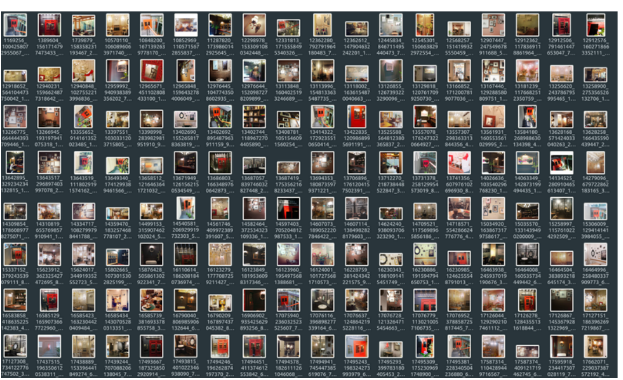

##  Data Augmentation이란?

그렇다면 어떻게 해야 할까요? 열심히 모은 데이터셋을 최대한 활용할 수 있는 방법은 없을까요?

Data augmentation은 갖고 있는 데이터셋을 여러 가지 방법으로 증강시켜 (augment) 실질적인 학습 데이터셋의 규모를 키울 수 있는 방법입니다.

일반적으로 하드디스크에 저장된 이미지 데이터를 메모리에 로드한 후, 학습시킬 때 변형을 가하는 방법을 사용합니다.

이를 통해 1장의 이미지를 더 다양하게 쓸 수 있게 되겠죠.
아래 비디오를 보고 data augmentation의 개념을 익혀 봅시다.

https://www.youtube.com/watch?v=JI8saFjK84o

데이터가 많아진다는 것은 과적합(overfitting)을 줄일 수 있다는 것을 의미합니다.

또한 우리가 가지고 있는 데이터셋이 실제 상황에서의 입력값과 다를 경우, augmentation을 통해서 실제 입력값과 비슷한 데이터 분포를 만들어 낼 수 있습니다.

예를 들어, 우리가 학습한 데이터는 노이즈가 많이 없는 사진이지만 테스트 이미지는 다양한 노이즈가 있는 경우 테스트에서 좋은 성능을 내기 위해서는 이러한 노이즈의 분포를 예측하고 학습 데이터에 노이즈를 삽입해 모델이
이런 노이즈에 잘 대응할 수 있도록 해야 합니다. 

이렇게 data augmentation은 데이터를 늘릴 뿐만 아니라 모델이 실제 테스트 환경에서 잘 동작할 수 있도록
도와주기도 합니다.

### 다양한 Image Augmentation 방법


그렇다면 image augmentation 기법에는 구체적으로 어떤 것들이 있는지 살펴봅시다. 

먼저 텐서플로우 튜토리얼에 소개된 image augmentation
예제들로부터 시작하겠습니다.

아래 텐서플로우 페이지에서는 텐서플로우 API를 사용해 바로 적용할 수 있는 image augmentation 기법들을 소개하고
있습니다.


https://www.google.com/url?sa=D&q=https://www.tensorflow.org/tutorials/images/data_augmentation&ust=1663052160000000&usg=AOvVaw3CDdf2H6KjXJJMDAKUQg4G&hl=ko

**Flipping**

Flip은 이미지를 대칭하는 기능입니다. 

우리가 거울을 보면 반전이 되듯이 좌우 또는 상하로 이미지를 반전시키는 방법입니다. 

분류 문제에서는 문제가 없을 수 있지만 물체 탐지(detection), 세그멘테이션(segmentation) 문제 등 정확한 정답 영역이 존재하는 문제에 적용할 때에는 라벨도 같이 좌우 반전을 해주어야 합니다.

만약 숫자나 알파벳 문자를 인식(recognition)하는 문제에 적용할 때도 주의해야 할 것입니다. 

상하나 좌우가 반정될 경우 다른 글자가 될 가능성이 있으니까요.

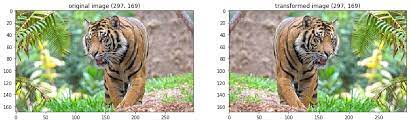

**Gray scale**

Gray scale은 3가지 채널(channel)을 가진 RGB 이미지를 하나의 채널을 가지도록 해줍니다. 

아래의 시각화 예제는 흑백 대신 다른 색상으로 이미지를
표현했습니다. 

텐서플로우에서 어떻게 구현이 되었는지는 아래 코드를 확인해
주세요. 

RGB 각각의 채널마다 가중치(weight)를 주어 가중합(weighted sum) 을 하였습니다. 

사용된 가중치의 경우 합이 1이 됨을 알 수 있습니다.

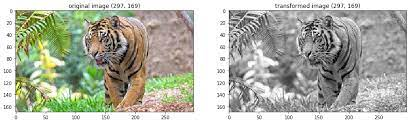

https://darkpgmr.tistory.com/66

**Saturation**


Saturation은 RGB 이미지를 HSV(Hue(색조), Saturation(채도), Value(명도) 의 3가지 성분으로 색을 표현) 이미지로 변경하고 S(saturation) 채널에 오프셋 (offset)을 적용, 조금 더 이미지를 선명하게 만들어 줍니다. 

이후 다시 우리가 사용하는 RGB 색상 모델로 변경을 해줍니다

<br>

**Brightness**

밝기를 조절할 수도 있습니다. 우리가 주로 사용하는 RGB에서 (255,255,255)는 흰색을, (0,0,0)은 검은색을 의미합니다. 

따라서 이미지는 RGB 채널에서 값을 더해주면 밝아지고, 빼주면 어두워집니다. 

이를 통해서 Brightness를 변경할 수
있습니다.

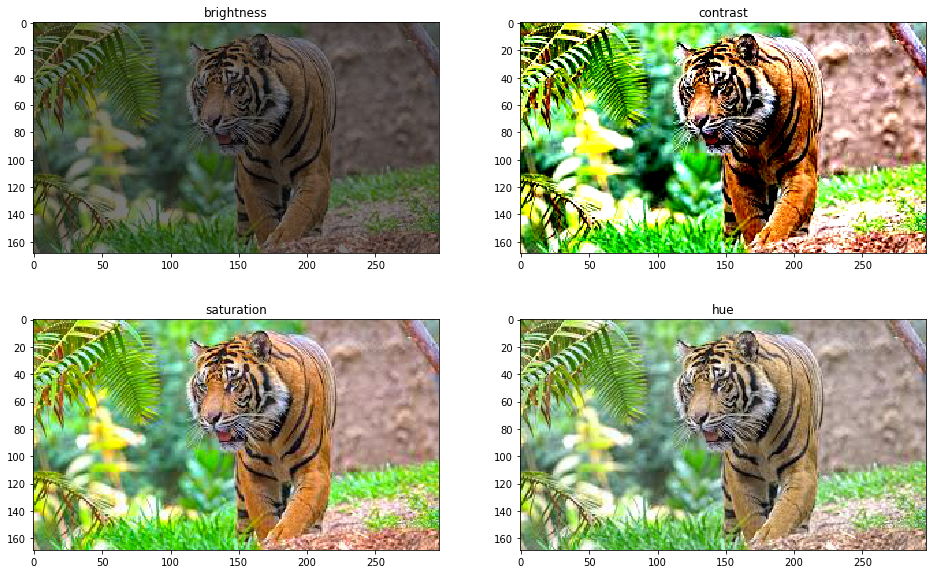

**Rotation**

Rotation은 이미지의 각도를 변환해 줍니다. 90도의 경우 직사각형 형태가 유지되기 때문에 이미지의 크기만 조절해 주면 바로 사용할 수 있습니다. 

하지만, 90도 단위로 돌리지 않는 경우 직사각형 형태에서 기존 이미지로 채우지 못하는 영역을 어떻게 처리해야 할지 유의해야 합니다.


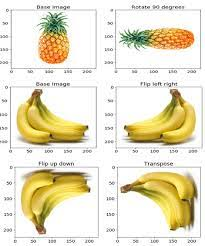

**Center Crop**


Center crop은 이미지의 중앙을 기준으로 확대하는 방법입니다. 

너무 작게 center crop을 할 경우 본래 가진 라벨과 맞지 않게 되는 상황이 발생할 수 있으니 주의가 필요합니다. 

예를 들어 고양이 라벨의 이미지를 확대해 한 장 더 만들어내려면, 이미지 내에 고양이의 형상을 유지해야 하고 털만 보이는 이미지를 만들어서는 안 됩니다.

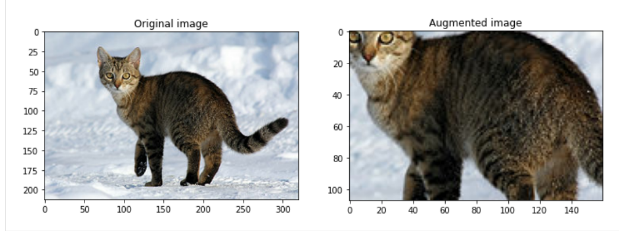

## 텐서플로우를 사용한 Image Augmentation

In [ ]:
# 필요한 라이브러리 및 이미지 설정

import tensorflow as tf
from PIL import Image
import matplotlib.pyplot as plt
import os

sample_img_path= '/content/mycat.jpg'
sample_img_path

'/content/mycat.jpg'

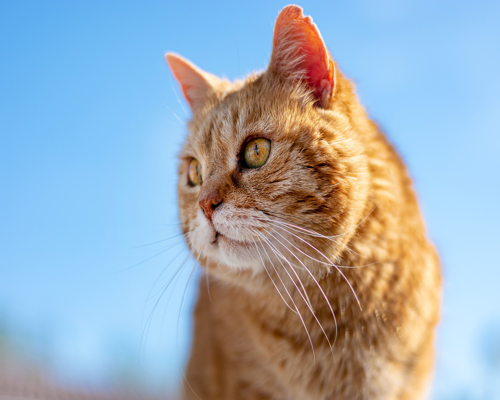

In [ ]:
image = Image.open(sample_img_path).resize((500, 400)) # 이미지에 따라 숫자를 바꾸어
image_tensor = tf.keras.preprocessing.image.img_to_array(image)
image

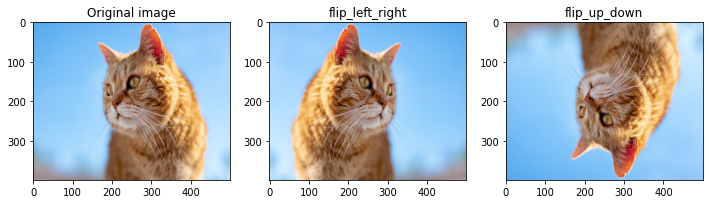

In [ ]:
"""
Flip 해보기

Flip을 적용해줍시다. 

Flip은 filp_left_right 와 flip_up_down 두 가지로 좌우와 상하 반전으로 구분됩니다.
"""

flip_lr_tensor = tf.image.flip_left_right(image_tensor)
flip_ud_tensor = tf.image.flip_up_down(image_tensor)
flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
plt.figure(figsize=(12, 12))
plt.subplot(1,3,1)
plt.title('Original image')
plt.imshow(image)
plt.subplot(1,3,2)
plt.title('flip_left_right')
plt.imshow(flip_lr_image)
plt.subplot(1,3,3)
plt.title('flip_up_down')
plt.imshow(flip_ud_image)
plt.show()

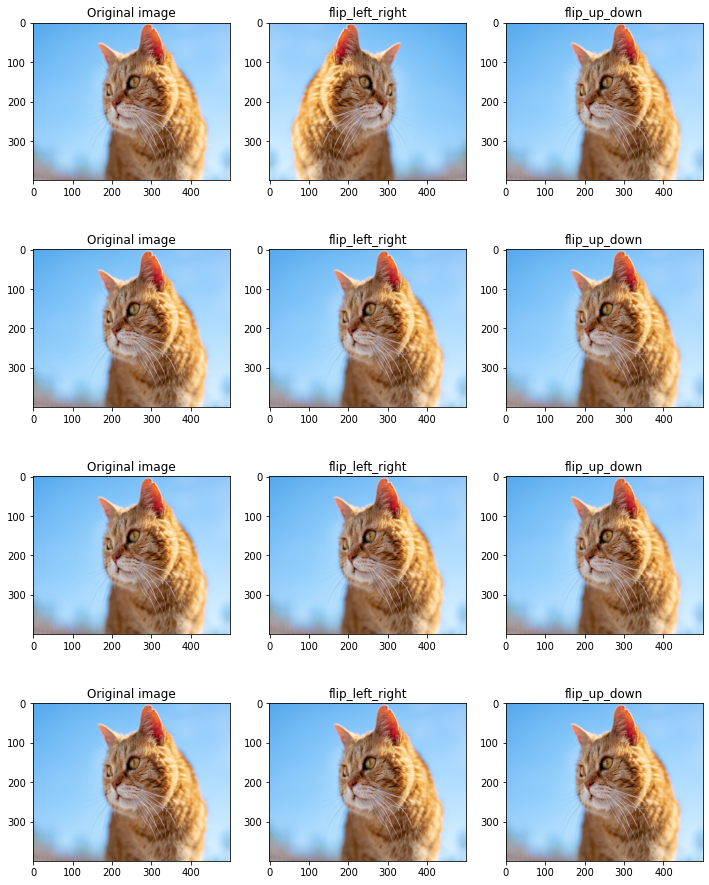

In [ ]:
"""
우리는 이를 확률에 따라서 적용되도록 해야 합니다. 

그래야 반전이 되지 않은 원본 데이터도 활용이 될 수 있기 때문이죠. 

이를 위해서 활용할 수 있는 것입니다. 

필요에 따라서는 직접 이 둘을 합쳐서 으로 상하좌우 반전을 적용하는 함수를 직접 만들어 볼 수 있겠네요.

"""

plt.figure(figsize=(12, 16))
row = 4
for i in range(row):
    flip_lr_tensor = tf.image.random_flip_left_right(image_tensor)
    flip_ud_tensor = tf.image.random_flip_up_down(image_tensor)
    flip_lr_image = tf.keras.preprocessing.image.array_to_img(flip_lr_tensor)
    flip_ud_image = tf.keras.preprocessing.image.array_to_img(flip_ud_tensor)
    plt.subplot(4,3,i*3+1)
    plt.title('Original image')
    plt.imshow(image)
    plt.subplot(4,3,i*3+2)
    plt.title('flip_left_right')
    plt.imshow(flip_lr_image)
    plt.subplot(4,3,i*3+3)
    plt.title('flip_up_down')
    plt.imshow(flip_ud_image)

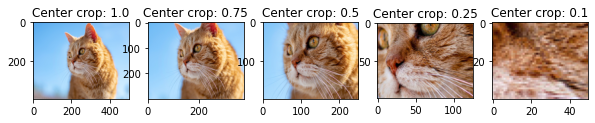

In [ ]:
"""
Center Crop해보기

적용할 때 주의해 사용해야합니다. 

central_fraction은 얼마나 확대를 할지를 조절하는 매개변수입니다
1.0인 경우는 원본 이미지와 같습니다. 그러나 예를 들어 고양이 이미지를 확대하면 0.5까지는 보일 수 있지만 0.25 수준으로
내려가면 털만 보이고 고양이의 형상을 찾기 어려울 수 있습니다. 

따라서 의 범위를 문제가 생기지 않는 범위에서 랜덤하게 조절되도록 해야 합니다.

"""

plt.figure(figsize=(12, 15))

central_fractions = [1.0, 0.75, 0.5, 0.25, 0.1]
col = len(central_fractions)
for i, frac in enumerate(central_fractions):
    cropped_tensor = tf.image.central_crop(image_tensor, frac)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)

    plt.subplot(1,col+1,i+1)
    plt.title(f'Center crop: {frac}')
    plt.imshow(cropped_img)

In [ ]:
#위의 코드처럼 random하게 해보기

def random_central_crop(image_tensor, range=(0, 1)):
    central_fraction = tf.random.uniform([1], minval=range[0], maxval=range[1],dtype=tf.float32)

    cropped_tensor = tf.image.central_crop(image_tensor, central_fraction)
    return cropped_tensor
print('=3')

=3


tf.random.uniform() : 랜덤값을 uniform distribution으로 뽑는것

tf.random.normal() : 랜덤값을 normal distribution으로 뽑는것- mean, std로 분포를 조절

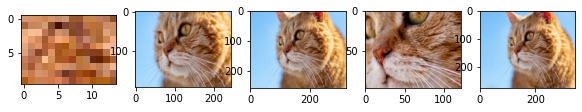

In [ ]:
plt.figure(figsize=(12, 15))
col = 5
for i, frac in enumerate(central_fractions):
    cropped_tensor =random_central_crop(image_tensor)
    cropped_img = tf.keras.preprocessing.image.array_to_img(cropped_tensor)
    plt.subplot(1,col+1,i+1)
    plt.imshow(cropped_img)